In [1]:
import pandas as pd

In [2]:
data_path = "../data/traffic_nodes/NodesCrashData.csv"
data: pd.DataFrame = pd.read_csv(data_path)

/tmp/ipykernel_2308449/4073203380.py:2: DtypeWarning: Columns (31,32,33,34) have mixed types. Specify dtype option on import or set low_memory=False.
  data: pd.DataFrame = pd.read_csv(data_path)


In [3]:
data['node'] = data['combined_neighborhood']
data.drop(columns=['combined_neighborhood'], inplace=True)
data = data[data['node'] != -1]
data

,Unnamed: 0.1,Unnamed: 0,CRASH_RECORD_ID,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,...,timediff_start,timediff_hours,severity_level,geometry,index_right,pri_neigh,sec_neigh,shape_area,shape_len,node
0,0,301963,5161efdc2c1e9a2b4258fdf2aa9e80842c24ecb809beca...,Y,2022-01-01 00:00:00,30,NO CONTROLS,NO CONTROLS,UNKNOWN,DARKNESS,...,0 days 00:00:00,0.000000,0,POINT (-87.749197337 41.878434704),94.0,Austin,AUSTIN,1.700378e+08,55473.345911,5
1,1,658973,c53b8a03d0579a96e405f12d3547fbe6efdac9e2ae3227...,Y,2022-01-01 00:00:00,30,NO CONTROLS,UNKNOWN,SNOW,UNKNOWN,...,0 days 00:00:00,0.000000,0,POINT (-87.605843516 41.783175785),43.0,Woodlawn,WOODLAWN,4.051574e+07,28960.059037,80
2,2,125473,185a472363e34e93586515ec860fe6222af49f29d59f40...,NaN,2022-01-01 00:01:00,30,NO CONTROLS,NO CONTROLS,RAIN,"DARKNESS, LIGHTED ROAD",...,0 days 00:01:00,0.016667,0,POINT (-87.669060386 41.959862116),34.0,Lake View,LAKE VIEW,7.656118e+07,69715.293130,38
3,3,740980,dfc8611244fa9d253b523b72507b7c3ef51669440dd949...,NaN,2022-01-01 00:13:00,25,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DARKNESS,...,0 days 00:13:00,0.216667,1,POINT (-87.62982444 41.892485454),97.0,River North,RIVER NORTH,3.876644e+07,31506.037810,59
4,4,233013,3b1793228e17d77a3f8155d61b18db544b4df619047aeb...,NaN,2022-01-01 00:16:00,25,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,RAIN,"DARKNESS, LIGHTED ROAD",...,0 days 00:16:00,0.266667,0,POINT (-87.668511878 41.939607388),34.0,Lake View,LAKE VIEW,7.656118e+07,69715.293130,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262278,262278,47608,5dde3daac608a9e8026f19effda4cb755a2faab3face6c...,NaN,2024-06-03 23:17:00,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",...,884 days 23:17:00,21239.283333,0,POINT (-87.684495109 41.805724373),79.0,Brighton Park,"BRIGHTON PARK,MCKINLEY PARK",7.589279e+07,36537.134306,11
262280,262280,47626,dc815451d034a5f1ceb74d6c3cd043aa976bcbc484d216...,NaN,2024-06-04 00:05:00,40,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",...,885 days 00:05:00,21240.083333,0,POINT (-87.580318542 41.793456251),25.0,Jackson Park,JACKSON PARK,2.354566e+07,32779.730780,36
262281,262281,46926,b978dd9f26ac7930fb68eb4c39eb24865bc220f60a06b5...,NaN,2024-06-04 00:20:00,30,OTHER,OTHER,OTHER,UNKNOWN,...,885 days 00:20:00,21240.333333,0,POINT (-87.631925482 41.794199485),19.0,Englewood,ENGLEWOOD,1.736000e+08,56144.046048,24
262282,262282,47714,728d4d39c0d070deeda0fc836bf34f70b3fe7d6c0a9951...,NaN,2024-06-04 00:25:00,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",...,885 days 00:25:00,21240.416667,0,POINT (-87.618732774 41.802173402),0.0,Grand Boulevard,BRONZEVILLE,4.849250e+07,28196.837157,30


In [4]:
def process_fn(df, dayofweek, hour):
  # Define functions
  def classify_speed_limit(x):
    x = int(x)
    if 0 <= x < 5:
        return 0
    elif 5 <= x < 10:
        return 5
    elif 10 <= x < 15:
        return 10
    elif 15 <= x < 20:
        return 15
    elif 20 <= x < 25:
        return 20
    elif 25 <= x < 30:
        return 25
    elif 30 <= x < 35:
        return 30
    elif 35 <= x < 40:
        return 35
    elif 40 <= x < 45:
        return 40
    elif 45 <= x < 50:
        return 45
    elif 50 <= x < 55:
        return 50
    elif 55 <= x < 60:
        return 55
    elif 60 <= x < 65:
        return 60
    elif 65 <= x < 70:
        return 65
    elif 70 <= x < 75:
        return 70
    else:
        return 0

  def classify_control_device(x):
    x = str(x).strip()
    if x == 'NO CONTROLS':
        return 0
    elif x == 'TRAFFIC SIGNAL' or x == 'FLASHING CONTROL SIGNAL':
        return 1
    elif x == 'STOP SIGN/FLASHER':
        return 2
    elif x == 'UNKNOWN':
        return 3
    elif x in ['OTHER', 'OTHER REG. SIGN', 'OTHER WARNING SIGN', 'NO PASSING', 'LANE USE MARKING', 'YIELD', 'RAILROAD CROSSING GATE', 'RR CROSSING SIGN', 'OTHER RAILROAD CROSSING', 'PEDESTRIAN CROSSING SIGN', 'BICYCLE CROSSING SIGN', 'SCHOOL ZONE', 'DELINEATORS', 'POLICE/FLAGMAN']:
        return 4
    else:
        return 3

  def classify_device_condition(x):
    if x == 'NO CONTROLS':
      return 0
    elif x == 'FUNCTIONING PROPERLY':
      return 1
    elif x == 'UNKNOWN' or x == 'OTHER':
      return 2
    elif x  == 'FUNCTIONING IMPROPERLY' or x == 'NOT FUNCTIONING':
      return 3
    elif x == 'WORN REFLECTIVE MATERIAL':
      return 4
    elif x == 'MISSING':
      return 5
    else:
      return 2

  def classify_weather_condition(x):
    if x == 'CLEAR':
      return 0
    elif x == 'RAIN':
      return 1
    elif x == 'UNKNOWN' or x == 'OTHER':
      return 2
    elif x  == 'SNOW':
      return 3
    elif x == 'CLOUDY/OVERCAST':
      return 4
    elif x == 'FREEZING RAIN/DRIZZLE':
      return 5
    elif x == 'FOG/SMOKE/HAZE':
      return 6
    elif x == 'SLEET/HAIL':
      return 7
    elif x == 'BLOWING SNOW':
     return 8
    elif x == 'SEVERE CROSS WIND GATE':
      return 9
    elif x == 'BLOWING SAND, SOIL, DIRT':
      return 10
    else:
      return 2

  def classify_lighting_condition(x):
    if x == 'DAYLIGHT':
      return 0
    elif x == 'DARKNESS, LIGHTED ROAD':
      return 1
    elif x == 'UNKNOWN':
      return 2
    elif x  == 'DARKNESS':
      return 3
    elif x == 'DUSK':
      return 4
    elif x == 'DAWN':
      return 5
    else:
      return 2

  def classify_first_crash_type(x):
    if x == 'PARKED MOTOR VEHICLE':
      return 0
    elif x == 'REAR END':
      return 1
    elif x == 'SIDESWIPE SAME DIRECTION':
      return 2
    elif x  == 'TURNING':
      return 3
    elif x == 'ANGLE':
      return 4
    elif x == 'FIXED OBJECT' or x == 'OTHER OBJECT' or x == 'ANIMAL' or x == 'TRAIN':
      return 5
    elif x == 'PEDESTRIAN':
      return 6
    elif x == 'PEDALCYCLIST':
      return 7
    elif x == 'REAR TO FRONT':
      return 8
    elif x == 'SIDESWIPE OPPOSITE DIRECTION':
      return 9
    elif x == 'REAR TO SIDE':
      return 10
    elif x == 'HEAD ON':
      return 11
    elif x == 'REAR TO REAR':
      return 12
    elif x == 'OTHER NONCOLLISION':
      return 13
    elif x == 'OVERTURNED':
      return 14
    else:
      return 15

  def classify_trafficway_type(x):
    if x=='NOT DIVIDED':
      return 0
    elif x == 'DIVIDED - W/MEDIAN (NOT RAISED)':
      return 1
    elif x == 'FOUR WAY' or x == 'FIVE POINT, OR MORE':
      return 2
    elif x == 'ONE-WAY':
      return 3
    elif x == 'PARKING LOT' or x == 'ALLEY' or x == 'DRIVEWAY' or x == 'ROUNDABOUT':
      return 4
    elif x == 'DIVIDED - W/MEDIAN BARRIER':
      return 5
    elif x == 'OTHER' or x == 'NOT REPORTED' or x == 'UNKNOWN':
      return 6
    elif x == 'T-INTERSECTION' or x == 'UNKNOWN INTERSECTION TYPE' or x == 'Y-INTERSECTION' or x == 'L-INTERSECTION':
      return 7
    elif x=='CENTER TURN LANE' or x=='RAMP' or x == 'TRAFFIC ROUTE':
      return 8
    else:
      return 6

  def classify_alignment(x):
    x = str(x).strip()
    if x == 'STRAIGHT AND LEVEL':
        return 0
    elif x == 'CURVE, LEVEL' or x== 'CURVE ON GRADE' or x== 'CURVE ON HILLCREST':
        return 1
    elif x == 'STRAIGHT ON HILLCREST' or x== 'STRAIGHT ON GRADE':
        return 2
    else:
        return 3

  def classify_surface(x):
    x = str(x).strip()
    if x == 'DRY':
        return 0
    elif x in ['WET', 'SNOW OR SLUSH', 'ICE', 'SAND, MUD, DIRT']:
        return 1
    else:
        return 2

  def classify_defect(x):
    x = str(x).strip()
    if x == 'NO DEFECTS':
        return 0
    elif x in ['RUT, HOLES', 'WORN SURFACE', 'SHOULDER DEFECT', 'DEBRIS ON ROADWAY']:
        return 1
    elif x == 'OTHER' or x== 'UNKNOWN':
        return 2
    else:
        return 2

  def classify_crash_type(x):
    if x == 'NO INJURY / DRIVE AWAY':
      return 0
    elif x == 'INJURY AND / OR TOW DUE TO CRASH':
      return 1
    else:
      return 2

  def classify_damage(x):
    x = str(x).strip()
    if x == '$500 OR LESS':
        return 0
    elif x == '$501 - $1,500':
        return 1
    elif x == 'OVER $1,500':
        return 2
    else:
        return 3

  def classify_cause(x):
    x = str(x).strip()
    if x == 'UNABLE TO DETERMINE' or x == 'NOT APPLICABLE':
        return 0
    elif x == 'FAILING TO YIELD RIGHT-OF-WAY':
        return 1
    elif x == 'FOLLOWING TOO CLOSELY':
        return 2
    elif x == 'IMPROPER OVERTAKING/PASSING' or x == 'PASSING STOPPED SCHOOL BUS':
        return 3
    elif x == 'IMPROPER BACKING':
        return 4
    elif x == 'IMPROPER LANE USAGE' or x == 'DRIVING ON WRONG SIDE/WRONG WAY':
        return 5
    elif x == 'DRIVING SKILLS/KNOWLEDGE/EXPERIENCE':
        return 6
    elif x == 'IMPROPER TURNING/NO SIGNAL' or x == 'TURNING RIGHT ON RED':
        return 7
    elif x in ['DISREGARDING TRAFFIC SIGNALS', 'DISREGARDING STOP SIGN', 'DISREGARDING OTHER TRAFFIC SIGNS', 'DISREGARDING ROAD MARKINGS', 'DISREGARDING YIELD SIGN']:
        return 8
    elif x == 'WEATHER':
        return 9
    elif x == 'OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER':
        return 10
    elif x in ['DISTRACTION - FROM INSIDE VEHICLE', 'DISTRACTION - FROM OUTSIDE VEHICLE', 'CELL PHONE USE OTHER THAN TEXTING', 'DISTRACTION - OTHER ELECTRONIC DEVICE (NAVIGATION DEVICE, DVD PLAYER, ETC.)', 'TEXTING', 'VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)']:
        return 11
    elif x in ['UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED)', 'PHYSICAL CONDITION OF DRIVER', 'HAD BEEN DRINKING (USE WHEN ARREST IS NOT MADE)']:
        return 12
    elif x in ['EXCEEDING AUTHORIZED SPEED LIMIT', 'FAILING TO REDUCE SPEED TO AVOID CRASH', 'EXCEEDING SAFE SPEED FOR CONDITIONS', 'EQUIPMENT - VEHICLE CONDITION']:
        return 13
    elif x in ['ANIMAL', 'OBSTRUCTED CROSSWALKS', 'EVASIVE ACTION DUE TO ANIMAL, OBJECT, NONMOTORIST', 'BICYCLE ADVANCING LEGALLY ON RED LIGHT', 'MOTORCYCLE ADVANCING LEGALLY ON RED LIGHT', 'ROAD ENGINEERING/SURFACE/MARKING DEFECTS', 'ROAD CONSTRUCTION/MAINTENANCE', 'RELATED TO BUS STOP']:
        return 14
    else:
        return 0

  def num_units(x):
    if pd.isna(x):
        return -1
    elif int(x)>4:
      return 5
    else:
      return int(x)

  def most_severe_injury(x):
    if x=='NO INDICATION OF INJURY':
      return 0
    elif x == 'NONINCAPACITATING INJURY':
      return 1
    elif x == 'REPORTED, NOT EVIDENT':
      return 2
    elif x == 'INCAPACITATING INJURY':
      return 3
    elif x == 'FATAL':
      return 4
    else:
      return 5

  df_copy = df.copy()
  filtered_df = df_copy[(df_copy['CRASH_DAY_OF_WEEK'] == dayofweek) & (df_copy['CRASH_HOUR'] == hour)]

  # Apply all functions
  filtered_df.loc[:,"POSTED_SPEED_LIMIT"] = filtered_df["POSTED_SPEED_LIMIT"].apply(classify_speed_limit)
  filtered_df.loc[:,"TRAFFIC_CONTROL_DEVICE"] = filtered_df["TRAFFIC_CONTROL_DEVICE"].apply(classify_control_device)
  filtered_df.loc[:,"DEVICE_CONDITION"] = filtered_df["DEVICE_CONDITION"].apply(classify_device_condition)
  filtered_df.loc[:,"WEATHER_CONDITION"] = filtered_df["WEATHER_CONDITION"].apply(classify_weather_condition)
  filtered_df.loc[:,"LIGHTING_CONDITION"] = filtered_df["LIGHTING_CONDITION"].apply(classify_lighting_condition)
  filtered_df.loc[:,"FIRST_CRASH_TYPE"] = filtered_df["FIRST_CRASH_TYPE"].apply(classify_first_crash_type)
  filtered_df.loc[:,"TRAFFICWAY_TYPE"] = filtered_df["TRAFFICWAY_TYPE"].apply(classify_trafficway_type)
  filtered_df.loc[:,"ALIGNMENT"] = filtered_df["ALIGNMENT"].apply(classify_alignment)
  filtered_df.loc[:,"ROADWAY_SURFACE_COND"] = filtered_df["ROADWAY_SURFACE_COND"].apply(classify_surface)
  filtered_df.loc[:,"ROAD_DEFECT"] = filtered_df["ROAD_DEFECT"].apply(classify_defect)
  filtered_df.loc[:,"CRASH_TYPE"] = filtered_df["CRASH_TYPE"].apply(classify_crash_type)
  filtered_df.loc[:,"DAMAGE"] = filtered_df["DAMAGE"].apply(classify_damage)
  filtered_df.loc[:,"PRIM_CONTRIBUTORY_CAUSE"] = filtered_df["PRIM_CONTRIBUTORY_CAUSE"].apply(classify_cause)
  filtered_df.loc[:,"SEC_CONTRIBUTORY_CAUSE"]= filtered_df["SEC_CONTRIBUTORY_CAUSE"].apply(classify_cause)
  filtered_df.loc[:,"NUM_UNITS"] = filtered_df["NUM_UNITS"].apply(num_units)
  filtered_df.loc[:,"MOST_SEVERE_INJURY"] = filtered_df["MOST_SEVERE_INJURY"].apply(most_severe_injury)

  # Drop unnecessary columns:
  filtered_df = filtered_df.drop(columns=['CRASH_RECORD_ID','CRASH_DATE_EST_I', 'REPORT_TYPE', 'DATE_POLICE_NOTIFIED', 'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'LANE_CNT', 'INTERSECTION_RELATED_I', 'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION', 'INJURIES_UNKNOWN', 'LATITUDE', 'LONGITUDE', 'LOCATION', 'WORK_ZONE_I', 'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'DOORING_I', 'STREET_NO', 'STREET_DIRECTION', 'STREET_NAME', 'Unnamed: 0.1', 'Unnamed: 0', 'geometry', 'index_right', 'pri_neigh', 'sec_neigh', 'shape_area', 'shape_len', 'timediff_start', 'timediff_hours', 'CRASH_MONTH', 'BEAT_OF_OCCURRENCE', 'CRASH_DATE', 'CRASH_DAY_OF_WEEK', 'CRASH_HOUR'])



  # Return dataframe
  return filtered_df


In [5]:
print((data['node']).value_counts())

node
5     11355
24     7036
33     6940
44     6839
8      6833
      ...  
49     1302
25     1084
21     1066
13     1033
36     1018
Name: count, Length: 81, dtype: int64


In [6]:
#example for day of week = 2, hour = 4
process_fn(data, 2, 4)

,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,CRASH_TYPE,DAMAGE,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,severity_level,node
452,10,0,0,2,3,5,6,0,2,2,0,2,0,0,1,0,0.0,0.0,0,51
453,30,0,0,0,1,1,0,0,1,0,0,0,2,0,2,0,0.0,0.0,0,66
2211,30,0,0,3,1,0,3,0,1,0,0,1,0,0,2,0,0.0,0.0,0,15
2212,30,1,1,0,3,1,1,0,0,0,0,2,0,0,2,0,0.0,0.0,0,5
2213,25,1,1,0,1,2,0,0,0,0,1,1,6,0,2,0,0.0,0.0,0,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259870,15,0,0,0,4,0,5,0,2,0,0,2,13,2,2,0,0.0,0.0,0,62
262090,20,0,0,0,0,0,3,0,0,0,0,2,0,0,2,0,0.0,0.0,0,48
262091,30,0,0,0,1,5,0,0,0,0,1,2,12,0,1,3,2.0,0.0,1,58
262092,25,0,0,0,5,11,6,0,0,0,0,2,7,0,2,0,0.0,0.0,0,53


In [7]:
import numpy as np

def aggregate_and_correlate(df, process_fn, dayofweek, hour):
    # Process the data
    processed_df = process_fn(df, dayofweek, hour)

    # Ensure 'node' column is present in processed_df
    if 'node' not in processed_df.columns:
        raise ValueError("The 'node' column is not present in the processed DataFrame.")

    # List of features to be included (replace with your actual feature columns)
    feature_columns = ['POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION',
                       'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE',
                       'TRAFFICWAY_TYPE', 'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT',
                       'CRASH_TYPE', 'DAMAGE', 'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE',
                       'NUM_UNITS', 'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL', "severity_level"]

    # Aggregate the data to get the average of each feature for each node
    node_feature_means = processed_df.groupby('node')[feature_columns].mean()

    # Normalize the features to have mean 0 and standard deviation 1
    normalized_features = (node_feature_means - node_feature_means.mean()) / node_feature_means.std()

    # Return the normalized matrix
    return normalized_features

# Example usage
dayofweek = 7  # Example: Sunday
hour = 7  # Example: 7 AM
matrix_81x18 = aggregate_and_correlate(data, process_fn, dayofweek, hour)
print(matrix_81x18)

     POSTED_SPEED_LIMIT TRAFFIC_CONTROL_DEVICE DEVICE_CONDITION  \
node                                                              
0             -1.279161               0.107857        -0.140523   
1              0.363441               1.183568         1.886676   
2              0.363441              -0.833391        -0.647323   
3              0.728464                0.88476         1.135862   
4             -0.841134               0.824998          0.53521   
...                 ...                    ...              ...   
76            -0.184093               -1.50571        -1.491989   
77            -1.552928               0.511249         0.478899   
78            -0.809846              -0.161071          0.68001   
79             -0.62212               -1.50571        -1.491989   
80            -1.279161              -1.169551        -1.069656   

     WEATHER_CONDITION LIGHTING_CONDITION FIRST_CRASH_TYPE TRAFFICWAY_TYPE  \
node                                              

In [9]:
print(matrix_81x18.iloc[70])

POSTED_SPEED_LIMIT         0.910975
TRAFFIC_CONTROL_DEVICE    -1.057497
DEVICE_CONDITION          -0.928878
WEATHER_CONDITION         -0.306517
LIGHTING_CONDITION        -0.903046
FIRST_CRASH_TYPE          -0.655496
TRAFFICWAY_TYPE           -0.006636
ALIGNMENT                  1.473132
ROADWAY_SURFACE_COND       0.067355
ROAD_DEFECT               -1.303906
CRASH_TYPE                 1.581247
DAMAGE                     0.651835
PRIM_CONTRIBUTORY_CAUSE    1.350427
SEC_CONTRIBUTORY_CAUSE     0.551121
NUM_UNITS                 -0.655933
MOST_SEVERE_INJURY         5.196328
INJURIES_TOTAL             4.042567
INJURIES_FATAL             8.888889
severity_level             3.758948
Name: 70, dtype: object


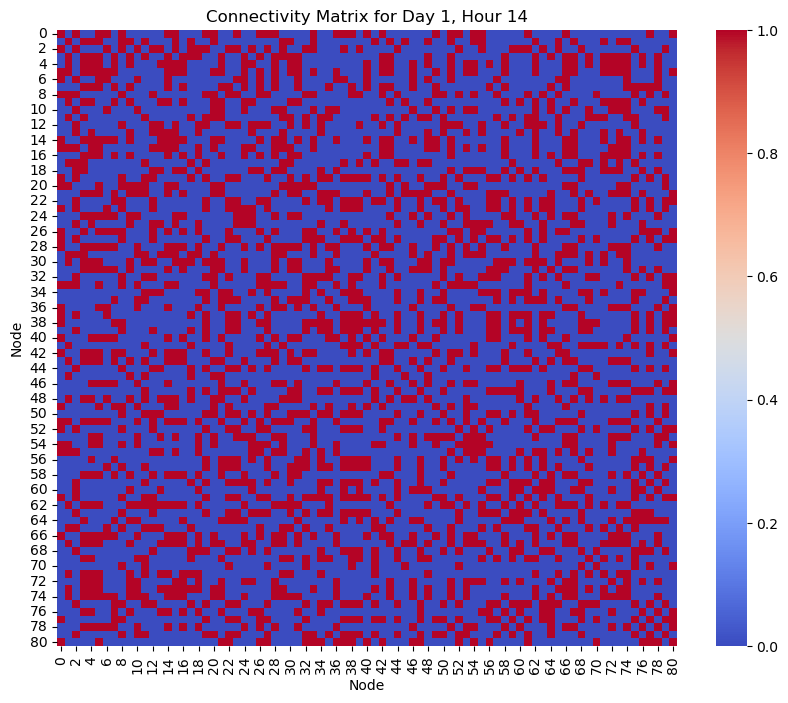

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming aggregate_and_correlate is already defined
def compute_node_connectivity_matrix(df, process_fn, dayofweek, hour, threshold):
    # Generate the 81x18 matrix
    feature_matrix = aggregate_and_correlate(df, process_fn, dayofweek, hour)

    # Ensure the feature_matrix is not empty
    if feature_matrix.empty:
        print(f"No data available for Day {dayofweek}, Hour {hour}")
        return None

    # Compute the correlation matrix (81x81) for nodes
    correlation_matrix = feature_matrix.T.corr()

    # Apply the threshold to create the connectivity matrix (binary matrix)
    connectivity_matrix = (correlation_matrix > threshold).astype(int)

    return connectivity_matrix

def visualize_connectivity_matrix(connectivity_matrix, dayofweek, hour):
    plt.figure(figsize=(10, 8))
    sns.heatmap(connectivity_matrix, annot=False, cmap='coolwarm', cbar=True)
    plt.title(f'Connectivity Matrix for Day {dayofweek}, Hour {hour}')
    plt.xlabel('Node')
    plt.ylabel('Node')
    plt.show()

# Example usage
dayofweek = 1  # Example: Monday
hour = 14  # Example: 2 PM
threshold = 0.1  # Correlation threshold

# Assuming 'data' is your DataFrame and 'process_fn' is your data processing function
connectivity_matrix = compute_node_connectivity_matrix(data, process_fn, dayofweek, hour, threshold)

if connectivity_matrix is not None:
    visualize_connectivity_matrix(connectivity_matrix, dayofweek, hour)


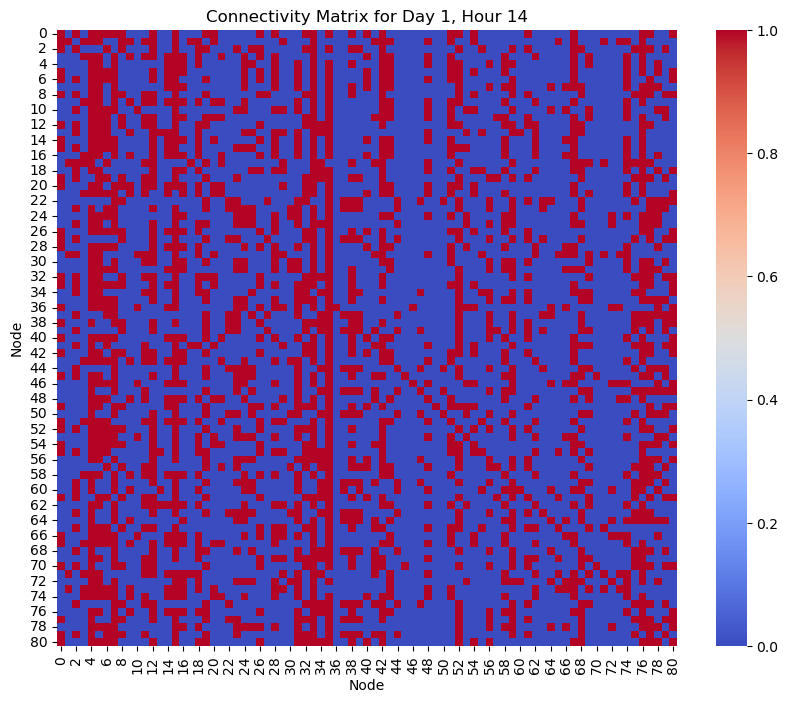

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

def aggregate_and_correlate(df, process_fn, dayofweek, hour):
    # Process the data
    processed_df = process_fn(df, dayofweek, hour)

    # Ensure 'node' column is present in processed_df
    if 'node' not in processed_df.columns:
        raise ValueError("The 'node' column is not present in the processed DataFrame.")

    # List of features to be included (replace with your actual feature columns)
    feature_columns = ['POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION',
                       'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE',
                       'TRAFFICWAY_TYPE', 'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT',
                       'CRASH_TYPE', 'DAMAGE', 'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE',
                       'NUM_UNITS', 'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL', "severity_level"]

    # Aggregate the data to get the average of each feature for each node
    node_feature_means = processed_df.groupby('node')[feature_columns].mean()

    # Normalize the features to have mean 0 and standard deviation 1
    node_feature_means = (node_feature_means - node_feature_means.mean()) / node_feature_means.std()

    # Return the matrix
    return node_feature_means

def compute_node_connectivity_matrix_knn(df, process_fn, dayofweek, hour, k):
    # Generate the 81x18 matrix
    feature_matrix = aggregate_and_correlate(df, process_fn, dayofweek, hour)

    # Ensure the feature_matrix is not empty
    if feature_matrix.empty:
        print(f"No data available for Day {dayofweek}, Hour {hour}")
        return None

    # Fit KNN to determine the neighbors
    knn = NearestNeighbors(n_neighbors=k, algorithm='auto')
    knn.fit(feature_matrix)
    distances, indices = knn.kneighbors(feature_matrix)

    # Create the connectivity matrix (81x81)
    connectivity_matrix = np.zeros((len(feature_matrix), len(feature_matrix)))

    # Fill the connectivity matrix based on KNN results
    for i, neighbors in enumerate(indices):
        for neighbor in neighbors:
            connectivity_matrix[i, neighbor] = 1

    return connectivity_matrix

def visualize_connectivity_matrix(connectivity_matrix, dayofweek, hour):
    plt.figure(figsize=(10, 8))
    sns.heatmap(connectivity_matrix, annot=False, cmap='coolwarm', cbar=True)
    plt.title(f'Connectivity Matrix for Day {dayofweek}, Hour {hour}')
    plt.xlabel('Node')
    plt.ylabel('Node')
    plt.show()

# Example usage
dayofweek = 1  # Example: Monday
hour = 14  # Example: 2 PM
k = 27  # Number of nearest neighbors

# Assuming 'data' is your DataFrame and 'process_fn' is your data processing function
connectivity_matrix_knn = compute_node_connectivity_matrix_knn(data, process_fn, dayofweek, hour, k)

if connectivity_matrix_knn is not None:
    visualize_connectivity_matrix(connectivity_matrix_knn, dayofweek, hour)
